# MÓDULO 4: LA CIENCIA DE DATOS Y LOS MODELOS DE ANALÍTICA PREDICTIVA EN LA INDUSTRIA 4.0

# 5- Aprendizaje semi-supervisado

Este ejercicio consiste en obtener un modelo clasificatorio óptimo a partir de un dataset con datos etiquetados y sin etiquetar: 
- El modelo clasificatorio a aplicar será un SVM lineal muy sencillo. Lo vamos a ajustar por un lado usando únicamente los datos etiquetados por defecto y por otro lado los datos etiquetados y sin etiquetar
- El método semi-supervisado a aplicar para etiquetar los datos no etiquetados será LabelSpreading
- El accuracy se obtiene al comparar la predicción del modelo SVM con unos datos de test etiquetados

¿Con qué approach conseguimos un mejor accuracy? 

Referencias: 
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.semi_supervised
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy

import sklearn
import sklearn.svm
from sklearn.semi_supervised import LabelSpreading

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Cargar datos de train y test

In [2]:
data_train = pd.read_csv('data_train.csv')
print(data_train.head())
labels_train = data_train.y.values
X_train = data_train.drop('y', axis=1).values
print(X_train.shape)

      x0     x1  y
0  3.813 -1.104  1
1  6.052 -0.967  1
2  3.616 -0.633  1
3  4.483 -0.236  1
4  4.430  0.318  1
(502, 2)


Tenemos 2 valores de clase: {1,2} y un conjunto de casos sin etiqueta: {-1} 

In [3]:
np.unique(labels_train, return_counts=True)

(array([-1,  1,  2]), array([300, 101, 101]))

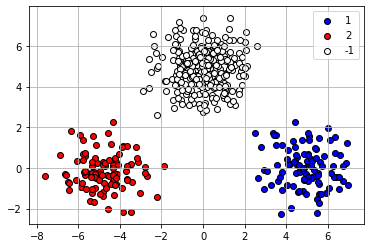

In [4]:
plt.scatter(X_train[:, 0][labels_train==1], X_train[:, 1][labels_train==1], c='b', edgecolors='black', label='1')
plt.scatter(X_train[:, 0][labels_train==2], X_train[:, 1][labels_train==2], c='r', edgecolors='black', label='2')
plt.scatter(X_train[:, 0][labels_train==-1], X_train[:, 1][labels_train==-1], c='w', edgecolors='black', label='-1')
plt.legend()
plt.grid()

In [5]:
data_test = pd.read_csv('data_test.csv')
print(data_test.head())
labels_test = data_test.y.values
X_test = data_test.drop('y', axis=1).values
print(X_test.shape)

      x0     x1  y
0  1.728 -3.971  2
1 -1.513 -5.492  2
2  0.257 -5.451  2
3  0.029 -4.888  2
4 -0.675 -5.989  2
(2162, 2)


Tenemos un gran número de casos de test, todos ellos contienen la etiqueta {2}

In [6]:
np.unique(labels_test, return_counts=True)

(array([2]), array([2162]))

#### EJERCICIO 1

Aplicamos el método LabelSpreading para etiquetar los casos no etiquetados

In [7]:
label_spread = ...
label_spread.fit...
output_labels = ...

In [ ]:
plt.scatter(X_train[:, 0][output_labels==1], X_train[:, 1][output_labels==1], c='b', edgecolors='black', label='1')
plt.scatter(X_train[:, 0][output_labels==2], X_train[:, 1][output_labels==2], c='r', edgecolors='black', label='2')
plt.scatter(X_train[:, 0][output_labels==-1], X_train[:, 1][output_labels==-1], c='w', edgecolors='black', label='-1')
plt.legend()
plt.grid()

Añadimos los datos de test al plot

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', edgecolors='black')
plt.scatter(X_train[:, 0][output_labels==1], X_train[:, 1][output_labels==1], c='b', edgecolors='black', label='1')
plt.scatter(X_train[:, 0][output_labels==2], X_train[:, 1][output_labels==2], c='r', edgecolors='black', label='2')
plt.scatter(X_train[:, 0][output_labels==-1], X_train[:, 1][output_labels==-1], c='w', edgecolors='black', label='-1')
plt.legend()
plt.grid()

### Train some SVMs

Vamos a comparar el accuracy de un modelo SVM lineal muy sencillo entrenado:
- utilizando  esos datos
- sin utilizar los datos que hemos etiquetado con el método label spreading

¿Con qué approach conseguimos un mejor accuracy?

Definimos un método para plotear el boundary que nos genera el modelo SVM

In [12]:
def plot_boundary(clf, X, y):
    # Adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

    # create a mesh to plot in
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.figure(figsize=(12,12))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

Definimos el modelo clasificatorio SVM

In [13]:
svm = sklearn.svm.LinearSVC(loss='l2', penalty='l2')

Ajustamos el modelo a los datos etiquetados por defecto

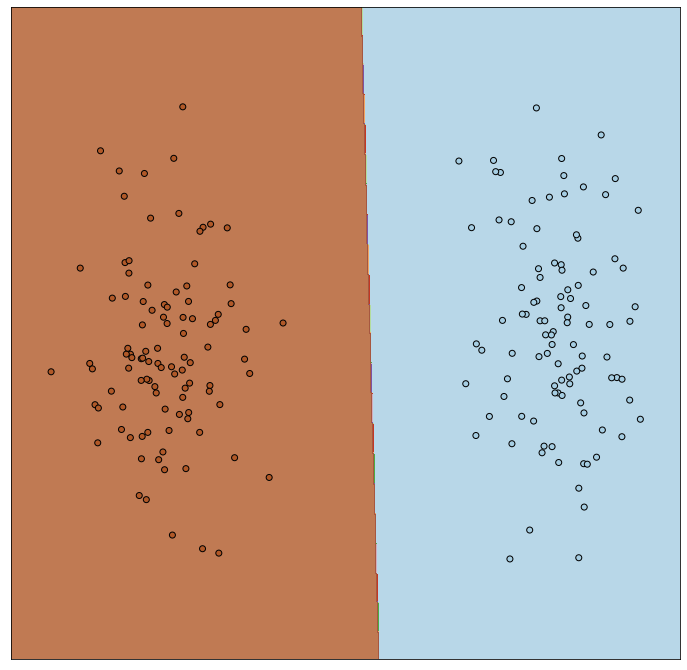

In [14]:
idx = np.where(labels_train != -1)[0]
svm.fit(X_train[idx], labels_train[idx])
plot_boundary(svm, X_train[idx], labels_train[idx])

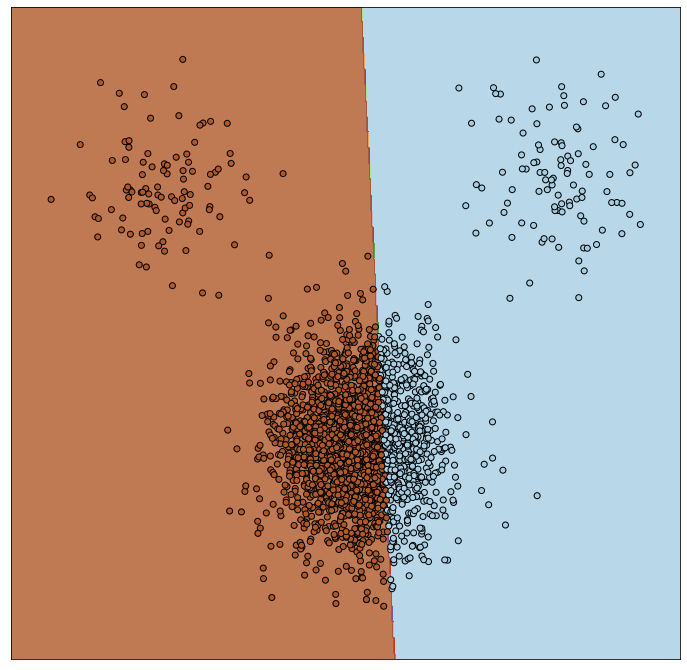

accuracy: 73.17298797409806%


In [15]:
output_predictions = svm.predict(X_test)
plot_boundary(svm, 
              np.concatenate([X_train[idx], X_test]), 
              np.concatenate([labels_train[idx], output_predictions]))
print('accuracy: ' + str(svm.score(X_test, labels_test)*100) + '%')

#### EJERCICIO 2

Ajustamos ahora el modelo a todos los datos de train, incluyendo los que previamente hemos etiquetado

In [ ]:
...

In [ ]:
...